In [27]:
# Following NeuralNine's Tutorial: https://youtu.be/N9NqTp_D_bw
import talib as ta 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import datetime as dt 
import yfinance as yf

In [28]:
ticker = yf.Ticker('GOOGL')
start_date = dt.datetime.now() - dt.timedelta(days=365*2) # 2YTD
data = ticker.history(start=start_date)

In [29]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-04 00:00:00-05:00,137.381978,138.116435,135.327509,135.367203,27137700,0.0,0.0
2024-01-05 00:00:00-05:00,135.724498,136.131427,134.136491,134.712143,22513900,0.0,0.0
2024-01-08 00:00:00-05:00,135.267963,137.967567,135.238189,137.798843,21404000,0.0,0.0
2024-01-09 00:00:00-05:00,137.461366,140.428949,137.113985,139.892990,24759600,0.0,0.0
2024-01-10 00:00:00-05:00,139.942628,141.927630,139.853307,141.213028,21320200,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-26 00:00:00-05:00,314.480011,315.089996,312.279999,313.510010,10899000,0.0,0.0
2025-12-29 00:00:00-05:00,311.369995,314.019989,310.619995,313.559998,19621800,0.0,0.0
2025-12-30 00:00:00-05:00,312.500000,316.950012,312.459991,313.850006,17380900,0.0,0.0


# Moving Averages

## Simple Moving Average (SMA)

SMA is the average of closing prices over a specified period.

**Formula:**
$$\text{SMA}_n = \frac{1}{n} \sum_{i=1}^{n} P_i$$

Where:
- $P_i$ are the closing prices
- $n$ is the number of periods (timeperiod)

**How it works:**
- Day 100: Average of days 1-100
- Day 101: Average of days 2-101
- Day 102: Average of days 3-102
- And so on...

It "smooths out" price fluctuations to show the trend. The first 100 values are `NaN` because we need 100 data points before calculating the first average.

In [30]:
data['SMA100'] = ta.SMA(data['Close'], timeperiod=100)

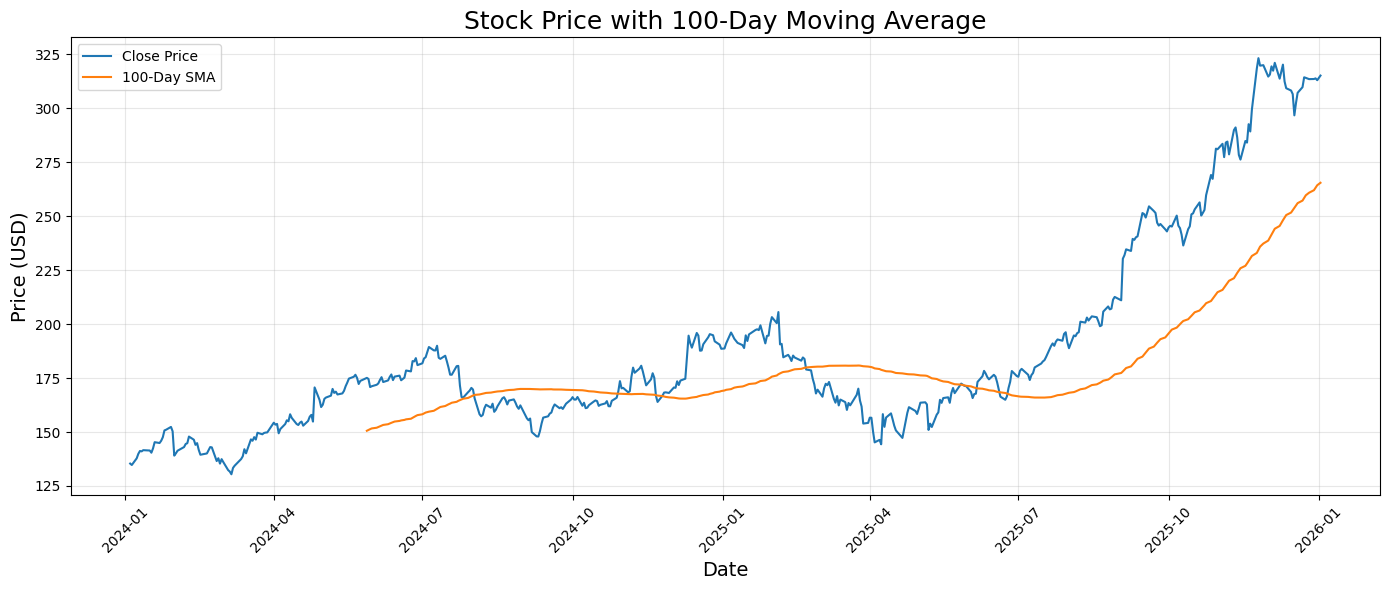

In [31]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price', linewidth=1.5)
plt.plot(data['SMA100'], label='100-Day SMA', linewidth=1.5)

plt.title('Stock Price with 100-Day Moving Average', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

## Exponential Moving Average (EMA)

EMA is similar to SMA but gives more weight to recent prices. It responds faster to price changes than a simple moving average.

**Formula:**
$$\text{EMA}_t = P_t \cdot \alpha + \text{EMA}_{t-1} \cdot (1 - \alpha)$$

Where:
- $P_t$ is the current price
- $\alpha = \frac{2}{n+1}$ is the smoothing factor
- $n$ is the number of periods (timeperiod)

**Key differences from SMA:**
- **Responsive**: Reacts faster to recent price changes because recent prices have higher weight
- **Recursive**: Each EMA value depends on the previous EMA value
- **No NaN values at start**: Can be calculated from the first value using the first price as the starting EMA

**When to use:**
- SMA: Good for identifying long-term trends
- EMA: Better for short-term trading and catching trend changes quickly

In [32]:
data['EMA100'] = ta.EMA(data['Close'], timeperiod=100)

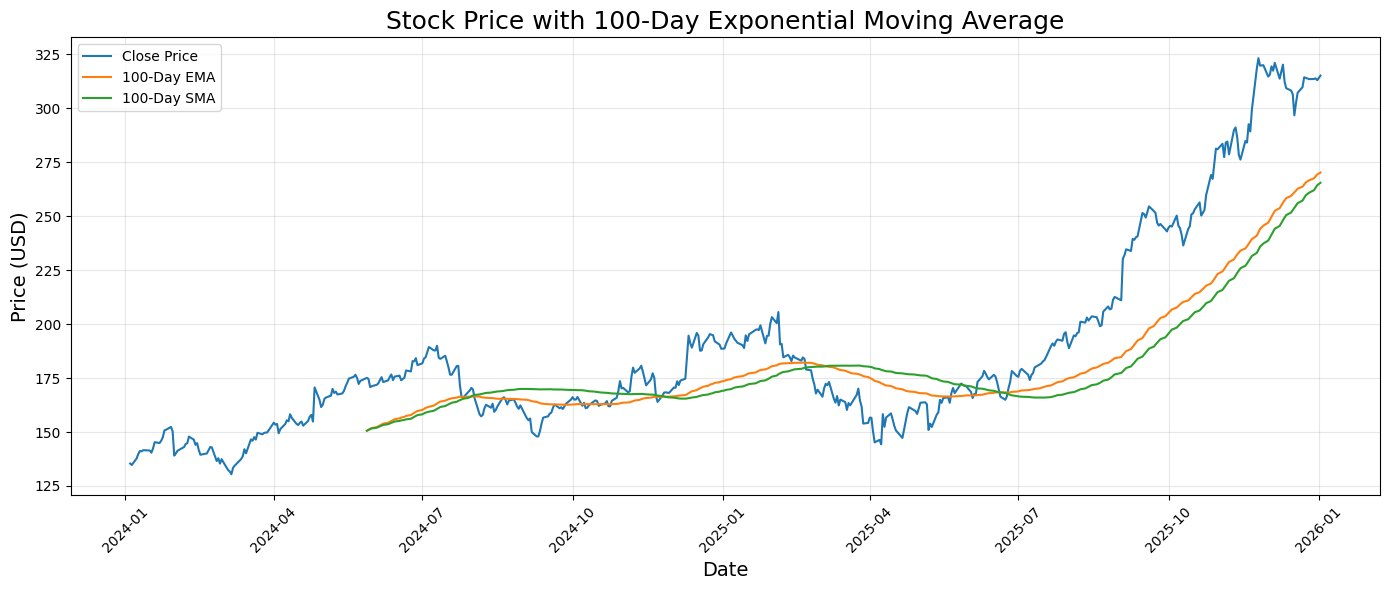

In [34]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price', linewidth=1.5)
plt.plot(data['EMA100'], label='100-Day EMA', linewidth=1.5)
plt.plot(data['SMA100'], label='100-Day SMA', linewidth=1.5)

plt.title('Stock Price with 100-Day Exponential Moving Average', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()